In [ ]:
# Parte 1: Configuração e Importação dos Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
import requests
from wordcloud import WordCloud

sns.set_theme(style="whitegrid")

consulta_cand_2024 = pd.read_csv('/content/consulta_cand_2024_BRASIL.csv', delimiter='\t', encoding='latin1')
bem_candidato_2024 = pd.read_csv('/content/bem_candidato_2024_BRASIL.csv', delimiter='\t', encoding='latin1')
consulta_cand_complementar_2024 = pd.read_csv('/content/consulta_cand_complementar_2024_BRASIL.csv', delimiter='\t', encoding='latin1', on_bad_lines='skip')
consulta_coligacao_2024 = pd.read_csv('/content/consulta_coligacao_2024_BRASIL.csv', delimiter='\t', encoding='latin1')

print(consulta_cand_2024.head())
print(bem_candidato_2024.head())
print(consulta_cand_complementar_2024.head())
print(consulta_coligacao_2024.head())

  DT_GERACAO;"HH_GERACAO";"ANO_ELEICAO";"CD_TIPO_ELEICAO";"NM_TIPO_ELEICAO";"NR_TURNO";"CD_ELEICAO";"DS_ELEICAO";"DT_ELEICAO";"TP_ABRANGENCIA";"SG_UF";"SG_UE";"NM_UE";"CD_CARGO";"DS_CARGO";"SQ_CANDIDATO";"NR_CANDIDATO";"NM_CANDIDATO";"NM_URNA_CANDIDATO";"NM_SOCIAL_CANDIDATO";"NR_CPF_CANDIDATO";"DS_EMAIL";"CD_SITUACAO_CANDIDATURA";"DS_SITUACAO_CANDIDATURA";"TP_AGREMIACAO";"NR_PARTIDO";"SG_PARTIDO";"NM_PARTIDO";"NR_FEDERACAO";"NM_FEDERACAO";"SG_FEDERACAO";"DS_COMPOSICAO_FEDERACAO";"SQ_COLIGACAO";"NM_COLIGACAO";"DS_COMPOSICAO_COLIGACAO";"SG_UF_NASCIMENTO";"DT_NASCIMENTO";"NR_TITULO_ELEITORAL_CANDIDATO";"CD_GENERO";"DS_GENERO";"CD_GRAU_INSTRUCAO";"DS_GRAU_INSTRUCAO";"CD_ESTADO_CIVIL";"DS_ESTADO_CIVIL";"CD_COR_RACA";"DS_COR_RACA";"CD_OCUPACAO";"DS_OCUPACAO";"CD_SIT_TOT_TURNO";"DS_SIT_TOT_TURNO"
0  27/10/2024;"12:30:36";2024;2;"ELEIÇÃO ORDINÁRI...                                                                                                                                                   

In [ ]:
consulta_cand_2024 = pd.read_csv('/content/consulta_cand_2024_BRASIL.csv', delimiter=';', encoding='latin1', quotechar='"')
bem_candidato_2024 = pd.read_csv('/content/bem_candidato_2024_BRASIL.csv', delimiter=';', encoding='latin1', quotechar='"')
consulta_cand_complementar_2024 = pd.read_csv('/content/consulta_cand_complementar_2024_BRASIL.csv', delimiter=';', encoding='latin1', quotechar='"', on_bad_lines='skip')
consulta_coligacao_2024 = pd.read_csv('/content/consulta_coligacao_2024_BRASIL.csv', delimiter=';', encoding='latin1', quotechar='"')

In [ ]:
# 2: Análise da Influência do Poder Econômico

prefeitos = consulta_cand_2024[consulta_cand_2024['DS_CARGO'] == 'PREFEITO']

bens_prefeitos = bem_candidato_2024[bem_candidato_2024['SQ_CANDIDATO'].isin(prefeitos['SQ_CANDIDATO'])]
bens_total = bens_prefeitos.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().reset_index()

prefeitos_bens = pd.merge(prefeitos, bens_total, on='SQ_CANDIDATO', how='left')

prefeitos_bens = prefeitos_bens.sort_values(by='VR_BEM_CANDIDATO', ascending=False)

maior_bem = prefeitos_bens.iloc[0]
print(f"O candidato a prefeito com maior valor declarado de bens foi: {maior_bem['NM_CANDIDATO']}, eleito: {maior_bem['DS_SIT_TOT_TURNO'] == 'ELEITO'}")


O candidato a prefeito com maior valor declarado de bens foi: DOUGLAS AUGUSTO PINHEIRO DE OLIVEIRA, eleito: False


In [ ]:
# 3: Análise das Coligações

consulta_coligacao_2024['NUM_PARTIDOS_COLIGACAO'] = consulta_coligacao_2024['DS_COMPOSICAO_COLIGACAO'].apply(lambda x: len(x.split('/')))

maiores_coligacoes = consulta_coligacao_2024.sort_values(by='NUM_PARTIDOS_COLIGACAO', ascending=False)
print("Maiores coligações em número de partidos:")
print(maiores_coligacoes[['NM_COLIGACAO', 'NUM_PARTIDOS_COLIGACAO']].head())

candidatos_maiores_coligacoes = consulta_cand_2024[consulta_cand_2024['SQ_COLIGACAO'].isin(maiores_coligacoes['SQ_COLIGACAO'])]
resultados = candidatos_maiores_coligacoes['DS_SIT_TOT_TURNO'].value_counts()
print("Resultados dos candidatos das maiores coligações:")
print(resultados)


Maiores coligações em número de partidos:
                  NM_COLIGACAO  NUM_PARTIDOS_COLIGACAO
49777   COLIGAÇÃO BETIM DO BEM                      18
23888   COLIGAÇÃO BETIM DO BEM                      18
33214   COLIGAÇÃO BETIM DO BEM                      18
142192  COLIGAÇÃO BETIM DO BEM                      18
2187    COLIGAÇÃO BETIM DO BEM                      18
Resultados dos candidatos das maiores coligações:
DS_SIT_TOT_TURNO
SUPLENTE            233580
NÃO ELEITO          136612
ELEITO POR QP        39556
#NULO#               24689
ELEITO POR MÉDIA     17877
ELEITO               10940
2º TURNO               200
Name: count, dtype: int64


  SG_UF SG_PARTIDO  NUM_CANDIDATOS
0    AC       AGIR              23
1    AC  CIDADANIA              16
2    AC         DC              14
3    AC        MDB             213
4    AC       NOVO              22


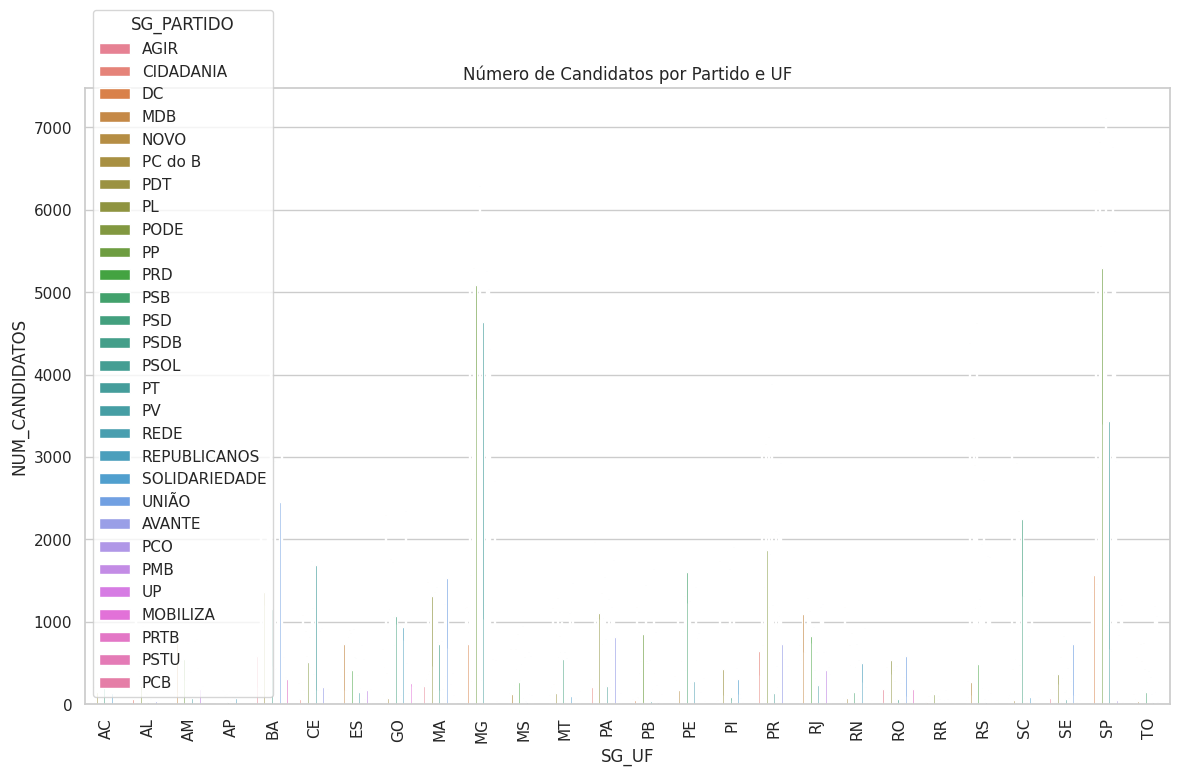

In [ ]:
# 4: Quantidade de Candidatos por Partido e UF

candidatos_por_uf_partido = consulta_cand_2024.groupby(['SG_UF', 'SG_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

print(candidatos_por_uf_partido.head())

plt.figure(figsize=(14, 8))
sns.barplot(data=candidatos_por_uf_partido, x='SG_UF', y='NUM_CANDIDATOS', hue='SG_PARTIDO')
plt.title('Número de Candidatos por Partido e UF')
plt.xticks(rotation=90)
plt.show()


           REGIAO     SG_PARTIDO  NUM_CANDIDATOS
0    CENTRO-OESTE           AGIR             787
1    CENTRO-OESTE         AVANTE             617
2    CENTRO-OESTE      CIDADANIA             205
3    CENTRO-OESTE             DC             799
4    CENTRO-OESTE            MDB            4129
..            ...            ...             ...
138           SUL           REDE             266
139           SUL   REPUBLICANOS            4706
140           SUL  SOLIDARIEDADE            1326
141           SUL          UNIÃO            6200
142           SUL             UP               6

[143 rows x 3 columns]


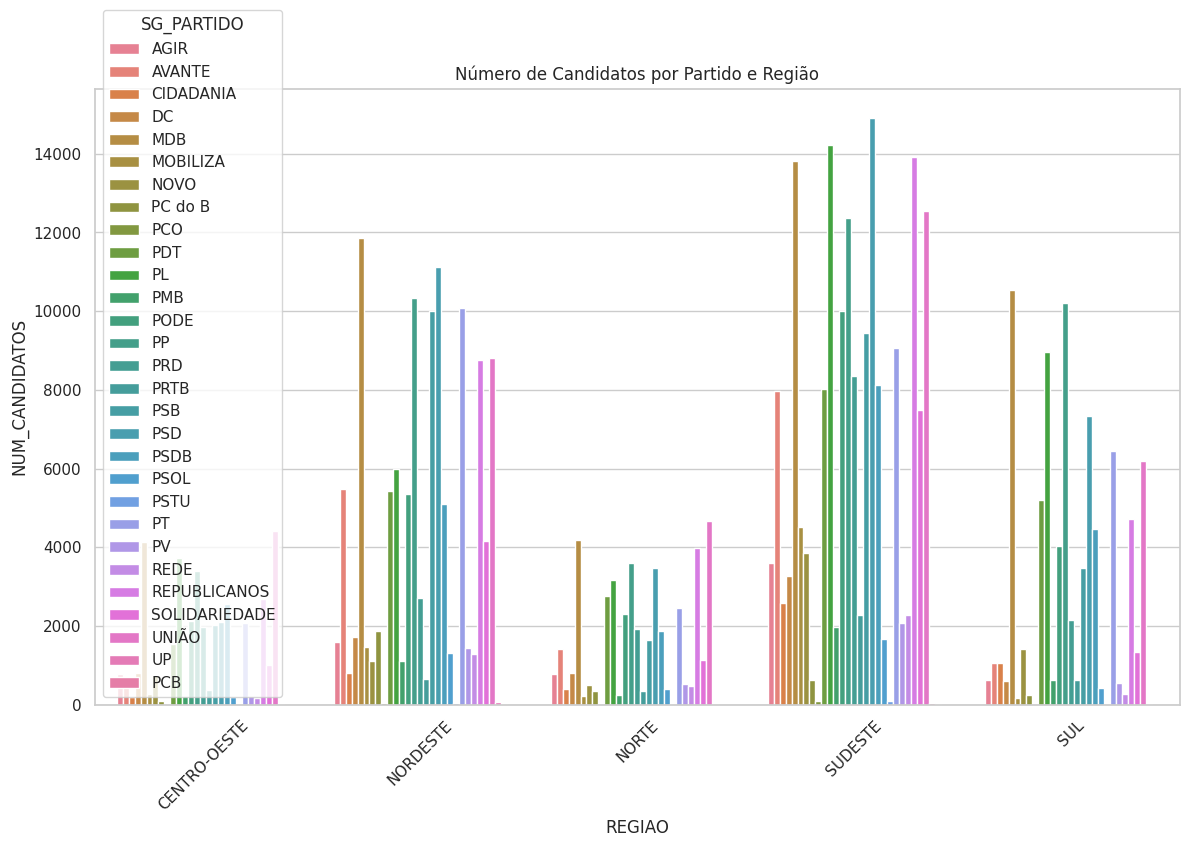

In [ ]:
# Parte 5: Análise de Candidaturas Regionais

regioes = {
    'NORTE': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
    'NORDESTE': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'CENTRO-OESTE': ['MT', 'MS', 'GO', 'DF'],
    'SUDESTE': ['SP', 'RJ', 'ES', 'MG'],
    'SUL': ['PR', 'SC', 'RS']
}

consulta_cand_2024['REGIAO'] = consulta_cand_2024['SG_UF'].apply(lambda uf: next((regiao for regiao, ufs in regioes.items() if uf in ufs), 'OUTRO'))

candidatos_por_regiao = consulta_cand_2024.groupby(['REGIAO', 'SG_PARTIDO']).size().reset_index(name='NUM_CANDIDATOS')

print(candidatos_por_regiao)

plt.figure(figsize=(14, 8))
sns.barplot(data=candidatos_por_regiao, x='REGIAO', y='NUM_CANDIDATOS', hue='SG_PARTIDO')
plt.title('Número de Candidatos por Partido e Região')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


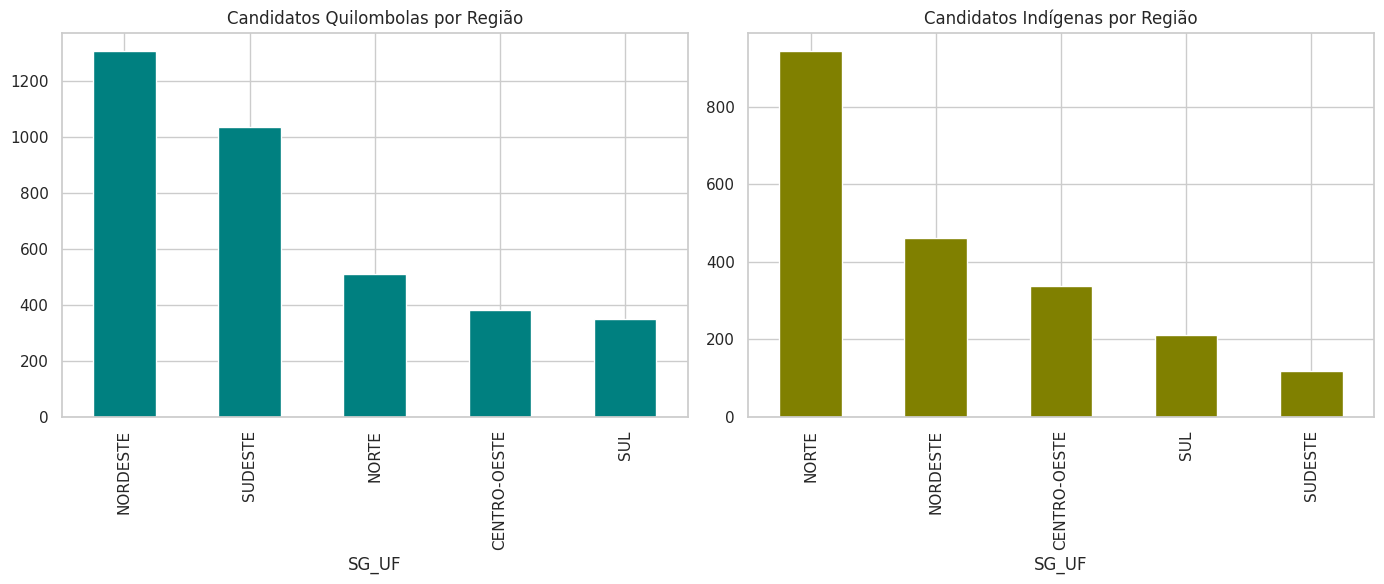

In [ ]:
# Parte 6: Análise dos Candidatos Indígenas e Quilombolas
quilombolas = consulta_cand_complementar_2024[consulta_cand_complementar_2024['ST_QUILOMBOLA'] == 'S']
candidatos_indigenas = consulta_cand_complementar_2024[consulta_cand_complementar_2024['CD_ETNIA_INDIGENA'] > 0]

quilombolas = pd.merge(quilombolas, consulta_cand_2024[['SQ_CANDIDATO', 'SG_UF']], on='SQ_CANDIDATO', how='left')
candidatos_indigenas = pd.merge(candidatos_indigenas, consulta_cand_2024[['SQ_CANDIDATO', 'SG_UF']], on='SQ_CANDIDATO', how='left')

quilombolas_por_regiao = quilombolas['SG_UF'].apply(lambda uf: next((regiao for regiao, ufs in regioes.items() if uf in ufs), 'OUTRO')).value_counts()
candidatos_indigenas_por_regiao = candidatos_indigenas['SG_UF'].apply(lambda uf: next((regiao for regiao, ufs in regioes.items() if uf in ufs), 'OUTRO')).value_counts()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
quilombolas_por_regiao.plot(kind='bar', color='teal', title='Candidatos Quilombolas por Região')
plt.subplot(1, 2, 2)
candidatos_indigenas_por_regiao.plot(kind='bar', color='olive', title='Candidatos Indígenas por Região')
plt.tight_layout()
plt.show()




In [ ]:
# 7 - Qual a rede social preferida dos candidatos? Separe por partido e por UF.

import pandas as pd
import plotly.express as px

url = "/content/rede_social_candidato_2024_BRASIL.csv"  # Substitua pelo caminho correto do arquivo
df = pd.read_csv(url, encoding='latin1', on_bad_lines='warn')

def identificar_rede_social(url):
    if 'instagram.com' in url:
        return 'Instagram'
    elif 'facebook.com' in url:
        return 'Facebook'
    elif 'youtube.com' in url:
        return 'YouTube'
    else:
        return 'Outros'

df['REDE_SOCIAL'] = df['DS_URL'].apply(identificar_rede_social)

# Criar uma coluna para identificar o partido do candidato
consulta_cand_df = pd.read_csv("/content/consulta_cand_20234_BRASIL.csv")  # Carregar dataset consulta_cand_20234_BRASIL
partido_dict = consulta_cand_df.set_index('SQ_CANDIDATO')['SG_PARTIDO'].to_dict()
df['SG_PARTIDO'] = df['SQ_CANDIDATO'].map(partido_dict)

rede_por_uf = df.groupby(['SG_UF', 'REDE_SOCIAL']).size().reset_index(name='QUANTIDADE')

fig_uf = px.bar(rede_por_uf, x='SG_UF', y='QUANTIDADE', color='REDE_SOCIAL',
                title='Redes Sociais Preferidas por Estado (UF)', barmode='group')
fig_uf.show()

if 'SG_PARTIDO' in df.columns:
    rede_por_partido = df.groupby(['SG_PARTIDO', 'REDE_SOCIAL']).size().reset_index(name='QUANTIDADE')

    fig_partido = px.bar(rede_por_partido, x='SG_PARTIDO', y='QUANTIDADE', color='REDE_SOCIAL',
                         title='Redes Sociais Preferidas por Partido', barmode='group')
    fig_partido.show()
else:
    print("Coluna 'SG_PARTIDO' não encontrada nos dados. A análise por partido não foi realizada.")

display(rede_por_uf)


In [7]:
# 8 - Utilize técnicas de NLP para determinar quais os principais termos (propostas) presentes nos planos de governo de cada UF

import os
import fitz
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

pdf_folder_path = "/content/SC"

pdf_files = [f for f in os.listdir(pdf_folder_path) if f.endswith('.pdf')]

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

data = []
for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_folder_path, pdf_file)
    uf = pdf_file.split('_')[0][4:6]
    text = extract_text_from_pdf(pdf_path)
    data.append({'UF': uf, 'texto': text})

df = pd.DataFrame(data)

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['texto_limpo'] = df['texto'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(df['texto_limpo'])

terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
df_tfidf = pd.concat([df[['UF']], tfidf_df], axis=1)

for uf in df['UF'].unique():
    print(f"Principais termos para UF {uf}:")
    print(df_tfidf[df_tfidf['UF'] == uf].iloc[:, 1:].mean().sort_values(ascending=False).head(10))
    print("\n")

In [ ]:
import os
import fitz  # PyMuPDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

pdf_folder_path = "/content/pdfs"  # Substitua pelo caminho correto onde os PDFs estão armazenados

pdf_files = [f for f in os.listdir(pdf_folder_path) if f.endswith('.pdf')]

def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

data = []
for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_folder_path, pdf_file)
    uf = pdf_file.split('_')[0][4:6]  # Extrair UF do nome do arquivo (ajuste conforme necessário)
    text = extract_text_from_pdf(pdf_path)
    data.append({'UF': uf, 'texto': text})

df = pd.DataFrame(data)

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):
    text = text.lower()  # Converter para minúsculas
    tokens = nltk.word_tokenize(text)  # Tokenizar o texto
    tokens = [word for word in tokens if word.isalnum()]  # Remover pontuações
    tokens = [word for word in tokens if word not in stop_words]  # Remover stopwords
    return ' '.join(tokens)

df['texto_limpo'] = df['texto'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=10)  # Limitar aos 10 principais termos
tfidf_matrix = vectorizer.fit_transform(df['texto_limpo'])

terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
df_tfidf = pd.concat([df[['UF']], tfidf_df], axis=1)

for uf in df['UF'].unique():
    print(f"Principais termos para UF {uf}:")
    print(df_tfidf[df_tfidf['UF'] == uf].iloc[:, 1:].mean().sort_values(ascending=False).head(10))
    print("\n")consulta_cand_2024.columns

Index(['DT_GERACAO;"HH_GERACAO";"ANO_ELEICAO";"CD_TIPO_ELEICAO";"NM_TIPO_ELEICAO";"NR_TURNO";"CD_ELEICAO";"DS_ELEICAO";"DT_ELEICAO";"TP_ABRANGENCIA";"SG_UF";"SG_UE";"NM_UE";"CD_CARGO";"DS_CARGO";"SQ_CANDIDATO";"NR_CANDIDATO";"NM_CANDIDATO";"NM_URNA_CANDIDATO";"NM_SOCIAL_CANDIDATO";"NR_CPF_CANDIDATO";"DS_EMAIL";"CD_SITUACAO_CANDIDATURA";"DS_SITUACAO_CANDIDATURA";"TP_AGREMIACAO";"NR_PARTIDO";"SG_PARTIDO";"NM_PARTIDO";"NR_FEDERACAO";"NM_FEDERACAO";"SG_FEDERACAO";"DS_COMPOSICAO_FEDERACAO";"SQ_COLIGACAO";"NM_COLIGACAO";"DS_COMPOSICAO_COLIGACAO";"SG_UF_NASCIMENTO";"DT_NASCIMENTO";"NR_TITULO_ELEITORAL_CANDIDATO";"CD_GENERO";"DS_GENERO";"CD_GRAU_INSTRUCAO";"DS_GRAU_INSTRUCAO";"CD_ESTADO_CIVIL";"DS_ESTADO_CIVIL";"CD_COR_RACA";"DS_COR_RACA";"CD_OCUPACAO";"DS_OCUPACAO";"CD_SIT_TOT_TURNO";"DS_SIT_TOT_TURNO"'], dtype='object')

In [ ]:
# Parte 9: Criação de Mapa Colorido das Eleições de 2020
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

brasil_municipios = gpd.read_file('/content/BR_Municipios_2020.shp')

try:
    resultados_2020 = pd.read_csv('/content/votacao_candidato_munzona_2020_BRASIL.csv', delimiter=';', encoding='latin1', on_bad_lines='skip')
    resultados_2020.columns = resultados_2020.columns.str.replace('"', '').str.strip()
except pd.errors.ParserError as e:
    print(f"Erro ao ler o arquivo CSV: {e}")

resultados_2020 = resultados_2020[resultados_2020['SG_UF'] == 'SP']  # Exemplo: trabalhar apenas com São Paulo
brasil_municipios = brasil_municipios[['NM_MUN', 'geometry']]
resultados_2020 = resultados_2020[['NM_MUNICIPIO', 'SG_PARTIDO']]

brasil_municipios['NM_MUN'] = brasil_municipios['NM_MUN'].str.upper().str.strip()

resultados_2020['NM_MUNICIPIO'] = resultados_2020['NM_MUNICIPIO'].str.upper().str.strip()

if 'NM_MUNICIPIO' in resultados_2020.columns and 'NM_MUN' in brasil_municipios.columns:
    print("Valores únicos em NM_MUNICIPIO:", resultados_2020['NM_MUNICIPIO'].unique()[:5])
    print("Valores únicos em NM_MUN:", brasil_municipios['NM_MUN'].unique()[:5])

    brasil_resultados = brasil_municipios.merge(resultados_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO', how='inner')
    print("GeoDataFrame após o merge:")
    print(brasil_resultados.head())

    if brasil_resultados.empty:
        print("O GeoDataFrame está vazio após o merge. Verifique os valores das chaves de junção.")
    else:
        brasil_resultados = brasil_resultados.to_crs(epsg=4326)

        cores_partido = {}

        partidos = brasil_resultados['SG_PARTIDO'].unique()
        for partido in partidos:
            cores_partido[partido] = "#%06x" % random.randint(0, 0xFFFFFF)

        brasil_resultados['cor'] = brasil_resultados['SG_PARTIDO'].map(cores_partido)

        fig, ax = plt.subplots(figsize=(15, 15))
        brasil_resultados.plot(ax=ax, color=brasil_resultados['cor'], edgecolor='black', linewidth=0.2)
        plt.title('Mapa dos Resultados das Eleições de 2020 por Município', fontsize=15)
        plt.axis('off')
        plt.show()

else:
    print("As colunas 'NM_MUNICIPIO' ou 'NM_MUN' não foram encontradas. Verifique o nome das colunas nos DataFrames.")